In [16]:
from lerobot.common.datasets.lerobot_dataset import LeRobotDataset, LeRobotDatasetMetadata

In [1]:
zarr_dataset_path = "/Users/chengkunli/working-converted/working-converted/team_kitchen_dummy_red_2025_05_09_22_13_38.zarr"

In [2]:
import zarr
z = zarr.open(zarr_dataset_path, mode='r')
print(z.tree())

/
 ├── robot0_eef_pose_lowdim (1392, 4, 4) float64
 ├── robot0_eef_pose_lowdim_timestamps (1392,) uint64
 ├── robot0_eef_pose_ref_lowdim (1392, 4, 4) float64
 ├── robot0_eef_pose_ref_lowdim_timestamps (1392,) uint64
 ├── robot0_ego_wrist_bottom_rgb (928, 1, 3, 224, 224) float32
 ├── robot0_ego_wrist_bottom_rgb_timestamps (928,) uint64
 ├── robot0_ego_wrist_top_rgb (928, 1, 3, 224, 224) float32
 ├── robot0_ego_wrist_top_rgb_timestamps (928,) uint64
 ├── robot0_hand_joints_lowdim (928, 16) float32
 ├── robot0_hand_joints_lowdim_timestamps (928,) uint64
 ├── workspace_rgb (928, 1, 3, 224, 224) float32
 └── workspace_rgb_timestamps (928,) uint64


In [3]:
# hand joints can be used as state

Shape: (928, 1, 3, 224, 224)
Data type: float32
Batch size: 928
Total frames per batch: 1


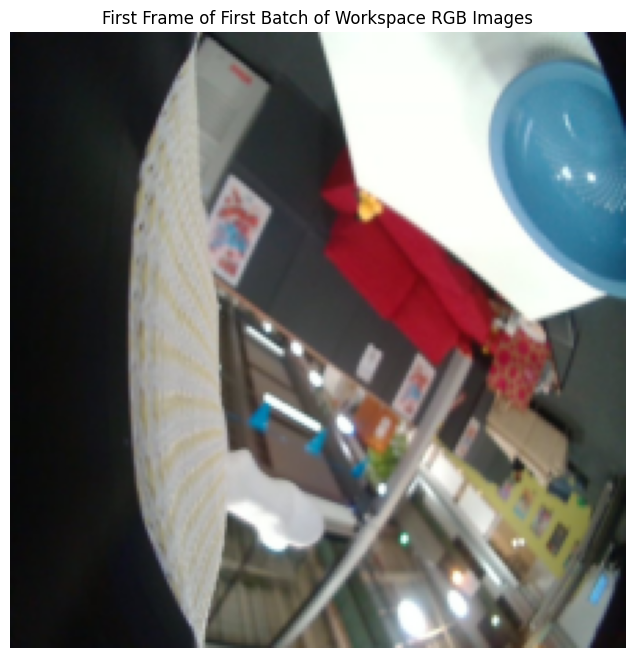

In [4]:
import numpy as np

import matplotlib.pyplot as plt

# Access the workspace_rgb array
workspace_rgb = z['robot0_ego_wrist_bottom_rgb']

# Print information about the array
print(f"Shape: {workspace_rgb.shape}")
print(f"Data type: {workspace_rgb.dtype}")


# If it's a batch of time series images
print(f"Batch size: {workspace_rgb.shape[0]}")
print(f"Total frames per batch: {workspace_rgb.shape[1]}")

# Show the first image of the first batch
plt.figure(figsize=(10, 8))
plt.imshow(np.transpose(workspace_rgb[0, 0], (1, 2, 0)))
plt.axis('off')
plt.title('First Frame of First Batch of Workspace RGB Images')
plt.show()

In [5]:
np.array(z['workspace_rgb_timestamps'])

array([   30051084,    69477731,   119738677,   169289264,   219506942,
         269371388,   319424722,   369321956,   419638317,   469567750,
         519264049,   569330147,   619579650,   669671574,   719077012,
         769320610,   819211812,   869244948,   919308356,   969898632,
        1019622689,  1079270304,  1119256286,  1169428738,  1219429464,
        1269473072,  1319275537,  1369271332,  1419575569,  1471125621,
        1519730558,  1569343071,  1619334237,  1669362150,  1719608020,
        1769478108,  1819821542,  1869162654,  1919632935,  1969510360,
        2019243411,  2069220081,  2119207848,  2169289338,  2219330094,
        2279137277,  2319155755,  2369442927,  2419269929,  2470083077,
        2519413169,  2569344407,  2619495132,  2669266864,  2720949373,
        2770180271,  2819161064,  2869210668,  2919326622,  2969336756,
        3019415176,  3069224816,  3119419384,  3169312033,  3219147685,
        3268989608,  3318985351,  3369073706,  3419250820,  3480

In [6]:
np.array(z['robot0_ego_wrist_top_rgb_timestamps'])

array([   28730958,    67662315,   117867460,   167598163,   217758945,
         267611351,   317682966,   367612996,   417831540,   467775494,
         517552432,   567571749,   617866282,   667826323,   717385084,
         767535723,   817525565,   867501518,   917551942,   968065446,
        1017833917,  1077512593,  1117549785,  1167732820,  1217731606,
        1267710074,  1317548868,  1367546173,  1417879904,  1479300263,
        1517984286,  1577668470,  1617632240,  1667638812,  1717909149,
        1767556326,  1817952949,  1867446246,  1917895202,  1967732447,
        2017567896,  2067502099,  2117502045,  2167535146,  2217522641,
        2277501029,  2317520981,  2367445833,  2417538385,  2467940234,
        2517686775,  2567610972,  2617791148,  2667580794,  2718583956,
        2767660258,  2817479125,  2867436151,  2917547325,  2967542258,
        3017615396,  3067499013,  3117572876,  3167566954,  3217532395,
        3267364356,  3317420245,  3367499522,  3417506927,  3468

In [7]:
np.array(z['robot0_eef_pose_ref_lowdim_timestamps']), np.array(z['robot0_eef_pose_ref_lowdim_timestamps']).shape

(array([          0,    33405698,    66780988, ..., 46299827885,
        46333155308, 46366513209], shape=(1392,), dtype=uint64),
 (1392,))

In [8]:
np.array(z['robot0_eef_pose_lowdim_timestamps']), np.array(z['robot0_eef_pose_lowdim_timestamps']).shape


(array([     218732,    33831750,    67169191, ..., 46300074155,
        46333437947, 46366770186], shape=(1392,), dtype=uint64),
 (1392,))

All visual modalities have identical timestamps: False
Pose modalities have identical timestamps: False

--- Timestamp Overlap Summary ---
eef_pose ↔ eef_pose_ref: 0 overlaps (0.0%)
eef_pose ↔ wrist_bottom: 0 overlaps (0.0%)
eef_pose ↔ wrist_top: 0 overlaps (0.0%)
eef_pose ↔ hand_joints: 0 overlaps (0.0%)
eef_pose ↔ workspace: 0 overlaps (0.0%)
eef_pose_ref ↔ wrist_bottom: 0 overlaps (0.0%)
eef_pose_ref ↔ wrist_top: 0 overlaps (0.0%)
eef_pose_ref ↔ hand_joints: 0 overlaps (0.0%)
eef_pose_ref ↔ workspace: 0 overlaps (0.0%)
wrist_bottom ↔ wrist_top: 0 overlaps (0.0%)
wrist_bottom ↔ hand_joints: 0 overlaps (0.0%)
wrist_bottom ↔ workspace: 0 overlaps (0.0%)
wrist_top ↔ hand_joints: 0 overlaps (0.0%)
wrist_top ↔ workspace: 0 overlaps (0.0%)
hand_joints ↔ workspace: 0 overlaps (0.0%)


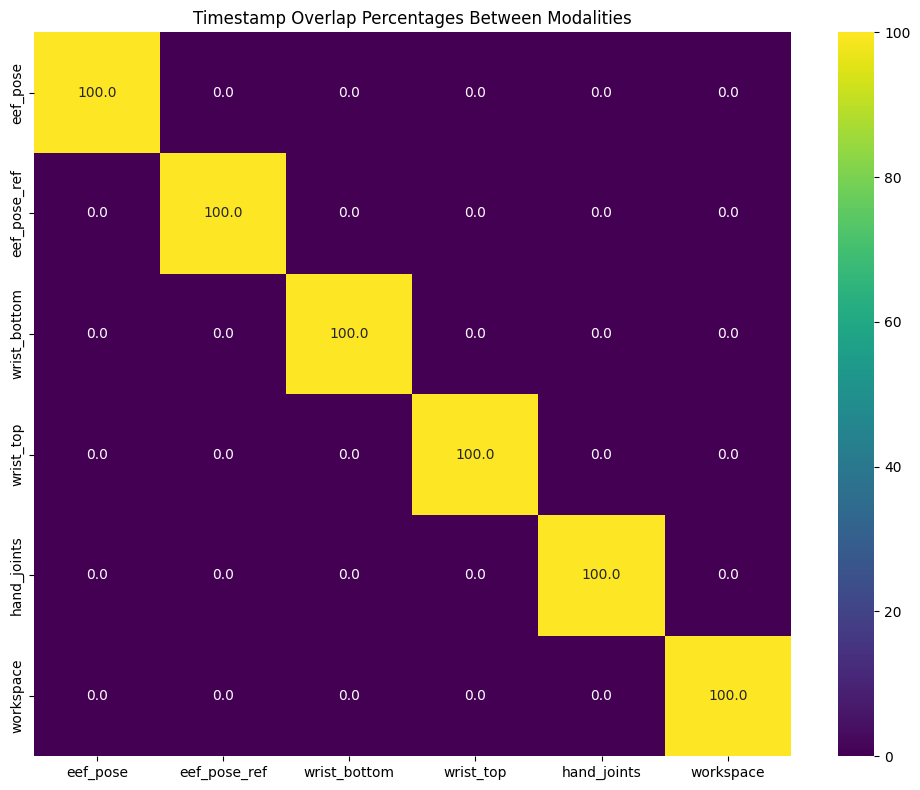


--- Sampling Rates ---
eef_pose: Average interval = 33.33 ms, Frequency ≈ 30.0 Hz
eef_pose_ref: Average interval = 33.33 ms, Frequency ≈ 30.0 Hz
wrist_bottom: Average interval = 49.99 ms, Frequency ≈ 20.0 Hz
wrist_top: Average interval = 49.99 ms, Frequency ≈ 20.0 Hz
hand_joints: Average interval = 49.99 ms, Frequency ≈ 20.0 Hz
workspace: Average interval = 49.99 ms, Frequency ≈ 20.0 Hz


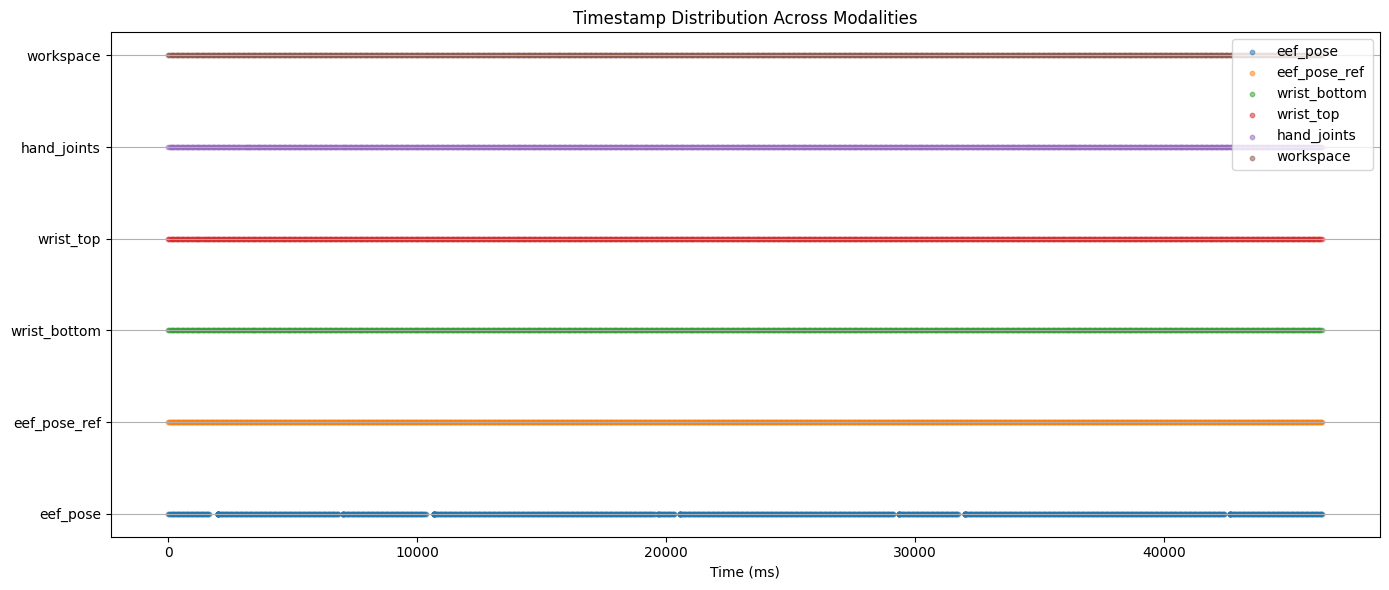

In [9]:
# Enhance timestamp overlap analysis to check all pairs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Load all timestamps
timestamps = {
    'eef_pose': np.array(z['robot0_eef_pose_lowdim_timestamps']),
    'eef_pose_ref': np.array(z['robot0_eef_pose_ref_lowdim_timestamps']),
    'wrist_bottom': np.array(z['robot0_ego_wrist_bottom_rgb_timestamps']),
    'wrist_top': np.array(z['robot0_ego_wrist_top_rgb_timestamps']),
    'hand_joints': np.array(z['robot0_hand_joints_lowdim_timestamps']),
    'workspace': np.array(z['workspace_rgb_timestamps'])
}

# Check if all Group 2 timestamps match
group2_identical = np.array_equal(timestamps['wrist_bottom'], timestamps['wrist_top']) and \
                  np.array_equal(timestamps['wrist_bottom'], timestamps['hand_joints']) and \
                  np.array_equal(timestamps['wrist_bottom'], timestamps['workspace'])

print(f"All visual modalities have identical timestamps: {group2_identical}")

# Check if Group 1 timestamps are identical
group1_identical = np.array_equal(timestamps['eef_pose'], timestamps['eef_pose_ref'])
print(f"Pose modalities have identical timestamps: {group1_identical}")

# Create matrices to store overlap counts and percentages
keys = list(timestamps.keys())
overlap_counts = np.zeros((len(keys), len(keys)), dtype=int)
overlap_percentages = np.zeros((len(keys), len(keys)))

# Calculate overlaps between all pairs
for i, key1 in enumerate(keys):
    for j, key2 in enumerate(keys):
        if i == j:
            # Same array has 100% overlap with itself
            overlap_counts[i, j] = len(timestamps[key1])
            overlap_percentages[i, j] = 100.0
        else:
            # Find intersection between different arrays
            overlapping = np.intersect1d(timestamps[key1], timestamps[key2])
            overlap_counts[i, j] = len(overlapping)
            # Calculate percentage relative to the smaller array
            smaller_size = min(len(timestamps[key1]), len(timestamps[key2]))
            overlap_percentages[i, j] = 100 * len(overlapping) / smaller_size

# Print summary of overlaps
print("\n--- Timestamp Overlap Summary ---")
for i, key1 in enumerate(keys):
    for j, key2 in enumerate(keys):
        if i < j:  # Only print each pair once
            print(f"{key1} ↔ {key2}: {overlap_counts[i, j]} overlaps ({overlap_percentages[i, j]:.1f}%)")

# Visualize overlap percentages as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(overlap_percentages, annot=True, fmt='.1f', xticklabels=keys, yticklabels=keys, cmap='viridis')
plt.title('Timestamp Overlap Percentages Between Modalities')
plt.tight_layout()
plt.show()

# Calculate sampling rates
print("\n--- Sampling Rates ---")
for name, ts in timestamps.items():
    if len(ts) > 1:
        avg_interval = np.mean(np.diff(ts)) / 1e6  # Convert to milliseconds
        frequency = 1000 / avg_interval
        print(f"{name}: Average interval = {avg_interval:.2f} ms, Frequency ≈ {frequency:.1f} Hz")

# Visualize timestamp distributions
plt.figure(figsize=(14, 6))
for i, (name, ts) in enumerate(timestamps.items()):
    # Normalize timestamps to start at 0
    ts_norm = (ts - ts.min()) / 1e6  # Convert to milliseconds
    plt.scatter(ts_norm, [i] * len(ts), label=name, s=10, alpha=0.5)

plt.yticks(range(len(timestamps)), timestamps.keys())
plt.xlabel('Time (ms)')
plt.title('Timestamp Distribution Across Modalities')
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
from lerobot.common.datasets.utils import dataset_to_policy_features

dataset_path = "/Users/chengkunli/Projects/lerobot/hackathon/dataset"  # TODO: Change this to your dataset path!

    # Load dataset metadata
dataset_metadata = LeRobotDatasetMetadata(repo_id="hackathon/mimic", root=dataset_path)

    # Convert dataset features to policy features
features = dataset_to_policy_features(dataset_metadata.features)

The dataset you requested (hackathon/mimic) is in 2.0 format.
While current version of LeRobot is backward-compatible with it, the version of your dataset still uses global
stats instead of per-episode stats. Update your dataset stats to the new format using this command:
```
python lerobot/common/datasets/v21/convert_dataset_v20_to_v21.py --repo-id=hackathon/mimic
```

If you encounter a problem, contact LeRobot maintainers on [Discord](https://discord.com/invite/s3KuuzsPFb)
or open an [issue on GitHub](https://github.com/huggingface/lerobot/issues/new/choose).



In [46]:
dataset_metadata.features

{'action': {'dtype': 'float32',
  'shape': (6,),
  'names': ['motor_1', 'motor_2', 'motor_3', 'motor_4', 'motor_5', 'motor_6']},
 'observation.state': {'dtype': 'float32',
  'shape': (6,),
  'names': ['motor_1', 'motor_2', 'motor_3', 'motor_4', 'motor_5', 'motor_6']},
 'timestamp': {'dtype': 'float32', 'shape': (1,), 'names': None},
 'episode_index': {'dtype': 'int64', 'shape': (1,), 'names': None},
 'frame_index': {'dtype': 'int64', 'shape': (1,), 'names': None},
 'task_index': {'dtype': 'int64', 'shape': (1,), 'names': None},
 'index': {'dtype': 'int64', 'shape': (1,), 'names': None},
 'observation.images.main': {'dtype': 'video',
  'shape': (240, 320, 3),
  'names': ['height', 'width', 'channel'],
  'info': {'video.fps': 30,
   'video.codec': 'mp4v',
   'video.pix_fmt': 'yuv420p',
   'video.is_depth_map': False,
   'has_audio': False}},
 'observation.images.secondary_0': {'dtype': 'video',
  'shape': (240, 320, 3),
  'names': ['height', 'width', 'channel'],
  'info': {'video.fps': 3

In [47]:
from lerobot.configs.types import FeatureType

dataset_path = "/Users/chengkunli/Projects/lerobot/hackathon/dataset"  # TODO: Change this to your dataset path!


# Load dataset metadata
dataset_metadata = LeRobotDatasetMetadata(repo_id="hackathon/mimic", root=dataset_path)

# Convert dataset features to policy features
features = dataset_to_policy_features(dataset_metadata.features)
output_features = {key: ft for key, ft in features.items() if ft.type is FeatureType.ACTION}
input_features = {key: ft for key, ft in features.items() if key not in output_features}


# Configure delta timestamps for features
# Print feature keys to verify what's actually in the dataset
print("Dataset features:", dataset_metadata.features.keys())

# Calculate observation indices based on configuration
# For observations, we want the most recent frames (e.g., [-1, 0] for 2 steps)
obs_indices = list(range(2 + 1, 1))

# For actions, we want future frames starting from current (index 0) up to n_action_steps
act_indices = list(range(8))

print(f"Using observation indices: {obs_indices}")
print(f"Using action indices: {act_indices}")

delta_timestamps = {}

# Add all observation features
for key in input_features.keys():
    delta_timestamps[key] = [i / dataset_metadata.fps for i in obs_indices]

# Add all action features
for key in output_features.keys():
    delta_timestamps[key] = [i / dataset_metadata.fps for i in act_indices]

print("Delta timestamps configuration:")
for k, v in delta_timestamps.items():
    print(f"  {k}: {v}")

# Create dataset
dataset = LeRobotDataset(
    dataset_path,
    delta_timestamps=delta_timestamps,
)


The dataset you requested (hackathon/mimic) is in 2.0 format.
While current version of LeRobot is backward-compatible with it, the version of your dataset still uses global
stats instead of per-episode stats. Update your dataset stats to the new format using this command:
```
python lerobot/common/datasets/v21/convert_dataset_v20_to_v21.py --repo-id=hackathon/mimic
```

If you encounter a problem, contact LeRobot maintainers on [Discord](https://discord.com/invite/s3KuuzsPFb)
or open an [issue on GitHub](https://github.com/huggingface/lerobot/issues/new/choose).

The dataset you requested (/Users/chengkunli/Projects/lerobot/hackathon/dataset) is in 2.0 format.
While current version of LeRobot is backward-compatible with it, the version of your dataset still uses global
stats instead of per-episode stats. Update your dataset stats to the new format using this command:
```
python lerobot/common/datasets/v21/convert_dataset_v20_to_v21.py --repo-id=/Users/chengkunli/Projects/lerobot/hackat

Dataset features: dict_keys(['action', 'observation.state', 'timestamp', 'episode_index', 'frame_index', 'task_index', 'index', 'observation.images.main', 'observation.images.secondary_0'])
Using observation indices: []
Using action indices: [0, 1, 2, 3, 4, 5, 6, 7]
Delta timestamps configuration:
  observation.state: []
  observation.images.main: []
  observation.images.secondary_0: []
  action: [0.0, 0.03333333333333333, 0.06666666666666667, 0.1, 0.13333333333333333, 0.16666666666666666, 0.2, 0.23333333333333334]


Resolving data files:   0%|          | 0/93 [00:00<?, ?it/s]

In [48]:
hf_dataset = dataset.hf_dataset
states = hf_dataset["observation.state"]
np.array(states).shape

(22555, 6)

In [ ]:
dataset.features.keys()

dict_keys(['action', 'observation.state', 'timestamp', 'episode_index', 'frame_index', 'task_index', 'index', 'observation.images.main', 'observation.images.secondary_0'])

: 

In [49]:
hf_dataset[0]

{'action': tensor([-0.3145, -0.8608,  0.6429,  1.0081,  0.0675,  0.0000]),
 'observation.state': tensor([-0.3222, -0.8976,  0.6429,  1.0249,  0.0752,  0.0015]),
 'timestamp': tensor(0.),
 'task_index': tensor(0),
 'episode_index': tensor(0),
 'frame_index': tensor(0),
 'index': tensor(0)}

In [50]:
np.array(hf_dataset['action']).shape

(22555, 6)

In [ ]:
np.array(hf_dataset['timestamp'])


array([ 0.        ,  0.03333334,  0.06666667, ..., 10.133333  ,
       10.166667  , 10.2       ], shape=(22555,), dtype=float32)

: 

In [51]:
np.array(hf_dataset['frame_index'])


array([  0,   1,   2, ..., 304, 305, 306], shape=(22555,))

In [52]:
np.array(hf_dataset['index']).shape


(22555,)

In [53]:
hf_dataset

Dataset({
    features: ['action', 'observation.state', 'timestamp', 'task_index', 'episode_index', 'frame_index', 'index'],
    num_rows: 22555
})

In [26]:
# ├── robot0_eef_pose_lowdim (1392, 4, 4) float64
#  ├── robot0_eef_pose_lowdim_timestamps (1392,) uint64
#  ├── robot0_eef_pose_ref_lowdim (1392, 4, 4) float64
#  ├── robot0_eef_pose_ref_lowdim_timestamps (1392,) uint64
#  ├── robot0_ego_wrist_bottom_rgb (928, 1, 3, 224, 224) float32
#  ├── robot0_ego_wrist_bottom_rgb_timestamps (928,) uint64
#  ├── robot0_ego_wrist_top_rgb (928, 1, 3, 224, 224) float32
#  ├── robot0_ego_wrist_top_rgb_timestamps (928,) uint64
#  ├── robot0_hand_joints_lowdim (928, 16) float32
#  ├── robot0_hand_joints_lowdim_timestamps (928,) uint64
#  ├── workspace_rgb (928, 1, 3, 224, 224) float32
#  └── workspace_rgb_timestamps (928,) uint64

# Create a new dataset based on these keys
# the dataset should have dict_keys(['action', 'observation.state', 'timestamp', 'episode_index', 'frame_index', 'task_index', 'index', 'observation.images.main', 'observation.images.secondary_0'])
# Obs:
# end_effector_obs (6+3), robot0_eef_pose_lowdim this is done by scipy convert to rotation matrix and take the first 2 columns, and concat with the translation vector
# hand_joints_obs (16), robot0_hand_joints_lowdim this is taken directly from the dataset but shifted by 1 into the future
# Action:
# end_effector_action (6+3), robot0_eef_pose_lowdim this is done by scipy convert 4x4 matrix to rotation matrix (3x3) and take the first 2 columns, and concat with the translation vector (1x3)
# hand_joints_action (16), robot0_hand_joints_lowdim this is taken directly from the dataset without shifting
# observation.images.workspace_rgb (3, 224, 224), robot0_ego_wrist_bottom_rgb this is taken directly from the dataset
# observation.images.wrist_top_rgb (3, 224, 224), robot0_ego_wrist_top_rgb this is taken directly from the dataset
# observation.images.wrist_bottom_rgb (3, 224, 224), robot0_ego_wrist_bottom_rgb this is taken directly from the dataset

# always make sure the timestamp in the original dataset is in the same order as the new dataset, and action is always in the future in terms of time



In [ ]:
import numpy as np
import torch
import scipy.spatial.transform as spt
from tqdm.auto import tqdm

# Load all data from the zarr dataset
hand_joints = np.array(z['robot0_hand_joints_lowdim'])
eef_pose = np.array(z['robot0_eef_pose_lowdim'])
wrist_bottom_imgs = np.array(z['robot0_ego_wrist_bottom_rgb'])
wrist_top_imgs = np.array(z['robot0_ego_wrist_top_rgb'])
workspace_imgs = np.array(z['workspace_rgb'])

# Load all timestamps
hand_joints_timestamps = np.array(z['robot0_hand_joints_lowdim_timestamps'])
eef_pose_timestamps = np.array(z['robot0_eef_pose_lowdim_timestamps'])
wrist_bottom_timestamps = np.array(z['robot0_ego_wrist_bottom_rgb_timestamps'])
wrist_top_timestamps = np.array(z['robot0_ego_wrist_top_rgb_timestamps'])
workspace_timestamps = np.array(z['workspace_rgb_timestamps'])

print(f"Loaded data: {len(hand_joints)} hand joint frames, {len(eef_pose)} pose frames")
print(f"Image shapes: {wrist_bottom_imgs.shape}, {wrist_top_imgs.shape}, {workspace_imgs.shape}")

# Function to process 4x4 pose matrix to rotation+translation format (6+3=9)
def process_pose_matrix(pose):
    # Extract rotation matrix and convert to rotation vector (first 2 columns = 6 values)
    rotation = pose[:3, :2].flatten()
    # Extract translation vector (last column, first 3 rows)
    translation = pose[:3, 3]
    # Concatenate to get (6+3=9) values
    return np.concatenate([rotation, translation])

# Define our dataset features with proper shapes - COMBINED hand joints (16) + pose (9) = 25 values
features = {
    "action": {
        "dtype": "float32", 
        "shape": (25,),  # Combined: hand_joints (16) + pose (9)
        "names": [f"joint_{i}" for i in range(16)] + ["rot_1", "rot_2", "rot_3", "rot_4", "rot_5", "rot_6", "trans_x", "trans_y", "trans_z"]
    },
    "observation.state": {
        "dtype": "float32", 
        "shape": (25,),  # Combined: hand_joints (16) + pose (9)
        "names": [f"joint_{i}" for i in range(16)] + ["rot_1", "rot_2", "rot_3", "rot_4", "rot_5", "rot_6", "trans_x", "trans_y", "trans_z"]
    },
    "timestamp": {
        "dtype": "float32", 
        "shape": (1,), 
        "names": None
    },
    "task_index": {
        "dtype": "int64", 
        "shape": (1,), 
        "names": None
    },
    "observation.images.main": {
        "dtype": "video", 
        "shape": (224, 224, 3),
        "names": ["height", "width", "channel"],
        "info": {
            "video.fps": 20, 
            "video.codec": "mp4v", 
            "video.pix_fmt": "yuv420p", 
            "video.is_depth_map": False,
            "has_audio": False
        }
    },
    "observation.images.secondary_0": {
        "dtype": "video", 
        "shape": (224, 224, 3),
        "names": ["height", "width", "channel"],
        "info": {
            "video.fps": 20, 
            "video.codec": "mp4v", 
            "video.pix_fmt": "yuv420p", 
            "video.is_depth_map": False,
            "has_audio": False
        }
    },
    "observation.images.secondary_1": {
        "dtype": "video", 
        "shape": (224, 224, 3),
        "names": ["height", "width", "channel"],
        "info": {
            "video.fps": 20, 
            "video.codec": "mp4v", 
            "video.pix_fmt": "yuv420p", 
            "video.is_depth_map": False,
            "has_audio": False
        }
    }
}

# Create a fresh dataset
dataset = LeRobotDataset.create(
    repo_id="chengkunli/zarr_converted",
    fps=20,
    root='/Users/chengkunli/Projects/lerobot/hackathon/converted_dataset_20fps',
    features=features,
    use_videos=True,
)

# We need n-1 frames to account for the future shifting for observations
max_frames = len(hand_joints) - 1  

# Find closest pose for each timestamp
def find_closest_index(target_timestamp, all_timestamps):
    idx = np.argmin(np.abs(all_timestamps - target_timestamp))
    return idx

# Process all frames and add to dataset
for i in tqdm(range(max_frames)):
    # Get current timestamp
    curr_timestamp = float(hand_joints_timestamps[i]) / 1e6  # Convert microseconds to seconds
    
    # Find pose matrix for current and next frame
    curr_pose_idx = find_closest_index(hand_joints_timestamps[i], eef_pose_timestamps)
    next_pose_idx = find_closest_index(hand_joints_timestamps[i+1] if i+1 < len(hand_joints) else hand_joints_timestamps[i], eef_pose_timestamps)
    
    # Process current and next pose matrices
    curr_pose_matrix = eef_pose[curr_pose_idx]
    next_pose_matrix = eef_pose[next_pose_idx]
    curr_processed_pose = process_pose_matrix(curr_pose_matrix)
    next_processed_pose = process_pose_matrix(next_pose_matrix)
    
    # Current and next hand joint values (for future shifting)
    curr_joints = hand_joints[i]
    next_joints = hand_joints[i+1] if i+1 < len(hand_joints) else hand_joints[i]
    
    # Combine hand joints and pose data for action and state
    action_combined = np.concatenate([curr_joints, curr_processed_pose])
    state_combined = np.concatenate([next_joints, next_processed_pose])
    
    # Get images - already in correct format (C,H,W) from zarr
    main_img = torch.from_numpy(np.transpose(workspace_imgs[i, 0], (1, 2, 0)))
    secondary_0_img = torch.from_numpy(np.transpose(wrist_top_imgs[i, 0], (1, 2, 0)))
    secondary_1_img = torch.from_numpy(np.transpose(wrist_bottom_imgs[i, 0], (1, 2, 0)))
    
    # Create frame dictionary with all required data
    frame = {
        # Action combines hand joints and processed pose
        "action": torch.from_numpy(action_combined).float(),
        
        # State combines next hand joints and next processed pose
        "observation.state": torch.from_numpy(state_combined).float(),
        
        # Task index (0 for all frames in this dataset)
        "task": "pour the red cup into the bowl",
        
        # Images from zarr dataset
        "observation.images.main": main_img,
        "observation.images.secondary_0": secondary_0_img,
        "observation.images.secondary_1": secondary_1_img,
    }
    
    # Add the frame to the dataset
    dataset.add_frame(frame)

# Save the episode when all frames are added
dataset.save_episode()
print(f"Dataset created at: {dataset.root}")
print(f"Total frames: {dataset.num_frames}")



Loaded data: 928 hand joint frames, 1392 pose frames
Image shapes: (928, 1, 3, 224, 224), (928, 1, 3, 224, 224), (928, 1, 3, 224, 224)


  0%|          | 0/927 [00:00<?, ?it/s]

Map:   0%|          | 0/927 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Svt[info]: -------------------------------------------
Svt[info]: SVT [version]:	SVT-AV1 Encoder Lib v3.0.0
Svt[info]: SVT [build]  :	Apple LLVM 15.0.0 (clang-1500.3.9.4)	 64 bit
Svt[info]: LIB Build date: Apr  5 2025 06:53:59
Svt[info]: -------------------------------------------
Svt[info]: Level of Parallelism: 4
Svt[info]: Number of PPCS 107
Svt[info]: [asm level on system : up to neon_dotprod]
Svt[info]: [asm level selected : up to neon_dotprod]
Svt[info]: -------------------------------------------
Svt[info]: SVT [config]: main profile	tier (auto)	level (auto)
Svt[info]: SVT [config]: width / height / fps numerator / fps denominator 		: 224 / 224 / 30 / 1
Svt[info]: SVT [config]: bit-depth / color format 					: 8 / YUV420
Svt[info]: SVT [config]: preset / tune / pred struct 					: 8 / PSNR / random access
Svt[info]: SVT [config]: gop size / mini-gop size / key-frame type 			: 2 / 32 / key frame
Svt[info]: SVT [config]: BRC mode / rate factor 					: CRF / 30 
Svt[info]: SVT [config

Dataset created at: /Users/chengkunli/Projects/lerobot/hackathon/converted_dataset_20fps
Total frames: 927


In [44]:
np.array(dataset.hf_dataset["timestamp"])

array([ 0.        ,  0.03333334,  0.06666667,  0.1       ,  0.13333334,
        0.16666667,  0.2       ,  0.23333333,  0.26666668,  0.3       ,
        0.33333334,  0.36666667,  0.4       ,  0.43333334,  0.46666667,
        0.5       ,  0.53333336,  0.56666666,  0.6       ,  0.6333333 ,
        0.6666667 ,  0.7       ,  0.73333335,  0.76666665,  0.8       ,
        0.8333333 ,  0.8666667 ,  0.9       ,  0.93333334,  0.96666664,
        1.        ,  1.0333333 ,  1.0666667 ,  1.1       ,  1.1333333 ,
        1.1666666 ,  1.2       ,  1.2333333 ,  1.2666667 ,  1.3       ,
        1.3333334 ,  1.3666667 ,  1.4       ,  1.4333333 ,  1.4666667 ,
        1.5       ,  1.5333333 ,  1.5666667 ,  1.6       ,  1.6333333 ,
        1.6666666 ,  1.7       ,  1.7333333 ,  1.7666667 ,  1.8       ,
        1.8333334 ,  1.8666667 ,  1.9       ,  1.9333333 ,  1.9666667 ,
        2.        ,  2.0333333 ,  2.0666666 ,  2.1       ,  2.1333334 ,
        2.1666667 ,  2.2       ,  2.2333333 ,  2.2666667 ,  2.3 

In [ ]:
import numpy as np
import torch
import scipy.spatial.transform as spt
from tqdm.auto import tqdm
import os
import glob

# Define list of zarr files to process - modify this according to your file locations
zarr_files = [
    "/Users/chengkunli/working-converted/working-converted/team_kitchen_dummy_red_2025_05_09_22_13_38.zarr",
    "/Users/chengkunli/working-converted/working-converted/team_kitchen_dummy_red_2025_05_09_23_10_00.zarr",
    # Add more zarr files here
    # "/path/to/second/recording.zarr",
    # "/path/to/third/recording.zarr",
]

# Task descriptions for each zarr file - expand this list to match your zarr files
task_descriptions = [
    "pour the red cup into the bowl",
    "pour the red cup into the bowl",
    # "task for second recording", 
    # "task for third recording",
]

# Define our dataset features with proper shapes - COMBINED hand joints (16) + pose (9) = 25 values
features = {
    "action": {
        "dtype": "float32", 
        "shape": (25,),  # Combined: hand_joints (16) + pose (9)
        "names": [f"joint_{i}" for i in range(16)] + ["rot_1", "rot_2", "rot_3", "rot_4", "rot_5", "rot_6", "trans_x", "trans_y", "trans_z"]
    },
    "observation.state": {
        "dtype": "float32", 
        "shape": (25,),  # Combined: hand_joints (16) + pose (9)
        "names": [f"joint_{i}" for i in range(16)] + ["rot_1", "rot_2", "rot_3", "rot_4", "rot_5", "rot_6", "trans_x", "trans_y", "trans_z"]
    },
    "timestamp": {
        "dtype": "float32", 
        "shape": (1,), 
        "names": None
    },
    "task_index": {
        "dtype": "int64", 
        "shape": (1,), 
        "names": None
    },
    "observation.images.main": {
        "dtype": "video", 
        "shape": (224, 224, 3),
        "names": ["height", "width", "channel"],
        "info": {
            "video.fps": 20, 
            "video.codec": "mp4v", 
            "video.pix_fmt": "yuv420p", 
            "video.is_depth_map": False,
            "has_audio": False
        }
    },
    "observation.images.secondary_0": {
        "dtype": "video", 
        "shape": (224, 224, 3),
        "names": ["height", "width", "channel"],
        "info": {
            "video.fps": 20, 
            "video.codec": "mp4v", 
            "video.pix_fmt": "yuv420p", 
            "video.is_depth_map": False,
            "has_audio": False
        }
    },
    "observation.images.secondary_1": {
        "dtype": "video", 
        "shape": (224, 224, 3),
        "names": ["height", "width", "channel"],
        "info": {
            "video.fps": 20, 
            "video.codec": "mp4v", 
            "video.pix_fmt": "yuv420p", 
            "video.is_depth_map": False,
            "has_audio": False
        }
    }
}

# Create a fresh dataset
dataset = LeRobotDataset.create(
    repo_id="chengkunli/zarr_multi_episodes",
    fps=30,
    root='/Users/chengkunli/Projects/lerobot/hackathon/multi_episode_dataset',
    features=features,
    use_videos=True,
)

# Function to process 4x4 pose matrix to rotation+translation format (6+3=9)
def process_pose_matrix(pose):
    # Extract rotation matrix and convert to rotation vector (first 2 columns = 6 values)
    rotation = pose[:3, :2].flatten()
    # Extract translation vector (last column, first 3 rows)
    translation = pose[:3, 3]
    # Concatenate to get (6+3=9) values
    return np.concatenate([rotation, translation])

# Find closest pose for each timestamp
def find_closest_index(target_timestamp, all_timestamps):
    idx = np.argmin(np.abs(all_timestamps - target_timestamp))
    return idx

# Process each zarr file as a separate episode
for episode_idx, zarr_path in enumerate(zarr_files):
    print(f"\nProcessing episode {episode_idx+1}/{len(zarr_files)}: {os.path.basename(zarr_path)}")
    
    # Clear any previous episode data
    dataset.clear_episode_buffer()
    
    # Load zarr file
    z = zarr.open(zarr_path, mode='r')
    
    # Load all data from the zarr dataset
    hand_joints = np.array(z['robot0_hand_joints_lowdim'])
    eef_pose = np.array(z['robot0_eef_pose_lowdim'])
    wrist_bottom_imgs = np.array(z['robot0_ego_wrist_bottom_rgb'])
    wrist_top_imgs = np.array(z['robot0_ego_wrist_top_rgb'])
    workspace_imgs = np.array(z['workspace_rgb'])
    
    # Load all timestamps
    hand_joints_timestamps = np.array(z['robot0_hand_joints_lowdim_timestamps'])
    eef_pose_timestamps = np.array(z['robot0_eef_pose_lowdim_timestamps'])
    
    print(f"Loaded data: {len(hand_joints)} hand joint frames, {len(eef_pose)} pose frames")
    
    # We need n-1 frames to account for the future shifting for observations
    max_frames = len(hand_joints) - 1
    
    # Get task for this episode
    task = task_descriptions[episode_idx] if episode_idx < len(task_descriptions) else f"task_{episode_idx}"
    
    # Process all frames and add to dataset
    for i in tqdm(range(max_frames)):
        # Find pose matrix for current and next frame
        curr_pose_idx = find_closest_index(hand_joints_timestamps[i], eef_pose_timestamps)
        next_pose_idx = find_closest_index(hand_joints_timestamps[i+1] if i+1 < len(hand_joints) else hand_joints_timestamps[i], eef_pose_timestamps)
        
        # Process current and next pose matrices
        curr_pose_matrix = eef_pose[curr_pose_idx]
        next_pose_matrix = eef_pose[next_pose_idx]
        curr_processed_pose = process_pose_matrix(curr_pose_matrix)
        next_processed_pose = process_pose_matrix(next_pose_matrix)
        
        # Current and next hand joint values (for future shifting)
        curr_joints = hand_joints[i]
        next_joints = hand_joints[i+1] if i+1 < len(hand_joints) else hand_joints[i]
        
        # Combine hand joints and pose data for action and state
        action_combined = np.concatenate([curr_joints, curr_processed_pose])
        state_combined = np.concatenate([next_joints, next_processed_pose])
        
        # Get images - convert to PyTorch tensors
        main_img = torch.from_numpy(np.transpose(workspace_imgs[i, 0], (1, 2, 0)))
        secondary_0_img = torch.from_numpy(np.transpose(wrist_top_imgs[i, 0], (1, 2, 0)))
        secondary_1_img = torch.from_numpy(np.transpose(wrist_bottom_imgs[i, 0], (1, 2, 0)))
        
        # Create frame dictionary with all required data
        frame = {
            # Action combines hand joints and processed pose
            "action": torch.from_numpy(action_combined).float(),
            
            # State combines next hand joints and next processed pose
            "observation.state": torch.from_numpy(state_combined).float(),
            
            # Task description for this episode
            "task": task,
            
            # Images from zarr dataset
            "observation.images.main": main_img,
            "observation.images.secondary_0": secondary_0_img,
            "observation.images.secondary_1": secondary_1_img,
        }
        
        # Add the frame to the dataset
        dataset.add_frame(frame)
    
    # Save the episode after all frames from this zarr file are added
    dataset.save_episode()
    print(f"Saved episode {episode_idx+1}, total frames in episode: {max_frames}")

print(f"\nDataset creation complete!")
print(f"Dataset created at: {dataset.root}")
print(f"Total episodes: {dataset.num_episodes}")
print(f"Total frames: {dataset.num_frames}")


Processing episode 1/2: team_kitchen_dummy_red_2025_05_09_22_13_38.zarr
Loaded data: 928 hand joint frames, 1392 pose frames


  0%|          | 0/927 [00:00<?, ?it/s]

Map:   0%|          | 0/927 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Svt[info]: -------------------------------------------
Svt[info]: SVT [version]:	SVT-AV1 Encoder Lib v3.0.0
Svt[info]: SVT [build]  :	Apple LLVM 15.0.0 (clang-1500.3.9.4)	 64 bit
Svt[info]: LIB Build date: Apr  5 2025 06:53:59
Svt[info]: -------------------------------------------
Svt[info]: Level of Parallelism: 4
Svt[info]: Number of PPCS 107
Svt[info]: [asm level on system : up to neon_dotprod]
Svt[info]: [asm level selected : up to neon_dotprod]
Svt[info]: -------------------------------------------
Svt[info]: SVT [config]: main profile	tier (auto)	level (auto)
Svt[info]: SVT [config]: width / height / fps numerator / fps denominator 		: 224 / 224 / 30 / 1
Svt[info]: SVT [config]: bit-depth / color format 					: 8 / YUV420
Svt[info]: SVT [config]: preset / tune / pred struct 					: 8 / PSNR / random access
Svt[info]: SVT [config]: gop size / mini-gop size / key-frame type 			: 2 / 32 / key frame
Svt[info]: SVT [config]: BRC mode / rate factor 					: CRF / 30 
Svt[info]: SVT [config

Saved episode 1, total frames in episode: 927

Processing episode 2/2: team_kitchen_dummy_red_2025_05_09_23_10_00.zarr
Loaded data: 987 hand joint frames, 1508 pose frames


  0%|          | 0/986 [00:00<?, ?it/s]

Map:   0%|          | 0/986 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Svt[info]: -------------------------------------------
Svt[info]: SVT [version]:	SVT-AV1 Encoder Lib v3.0.0
Svt[info]: SVT [build]  :	Apple LLVM 15.0.0 (clang-1500.3.9.4)	 64 bit
Svt[info]: LIB Build date: Apr  5 2025 06:53:59
Svt[info]: -------------------------------------------
Svt[info]: Level of Parallelism: 4
Svt[info]: Number of PPCS 107
Svt[info]: [asm level on system : up to neon_dotprod]
Svt[info]: [asm level selected : up to neon_dotprod]
Svt[info]: -------------------------------------------
Svt[info]: SVT [config]: main profile	tier (auto)	level (auto)
Svt[info]: SVT [config]: width / height / fps numerator / fps denominator 		: 224 / 224 / 30 / 1
Svt[info]: SVT [config]: bit-depth / color format 					: 8 / YUV420
Svt[info]: SVT [config]: preset / tune / pred struct 					: 8 / PSNR / random access
Svt[info]: SVT [config]: gop size / mini-gop size / key-frame type 			: 2 / 32 / key frame
Svt[info]: SVT [config]: BRC mode / rate factor 					: CRF / 30 
Svt[info]: SVT [config

Saved episode 2, total frames in episode: 986

Dataset creation complete!
Dataset created at: /Users/chengkunli/Projects/lerobot/hackathon/multi_episode_dataset
Total episodes: 2
Total frames: 1913


AttributeError: 'LeRobotDataset' object has no attribute 'get_episode'